In [1]:
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')
import datetime
import seaborn as sns

In [2]:
incidents = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
incidents = incidents[incidents['Date'] >= '01/01/2003'].sort_values('Date', ascending = True)
incidents["Date"] = pd.to_datetime(incidents["Date"])
incidents['Datetime Index'] = incidents["Date"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
incidents.set_index(incidents["Datetime Index"],inplace=True)


### Plot the number of incidents per year from 2003-2018. Have crime rates increased or decreased in general?

In [4]:
per = incidents.Date.dt.to_period("Y")
inc_count_by_year = incidents.groupby(per).count()['IncidntNum'].get_values()

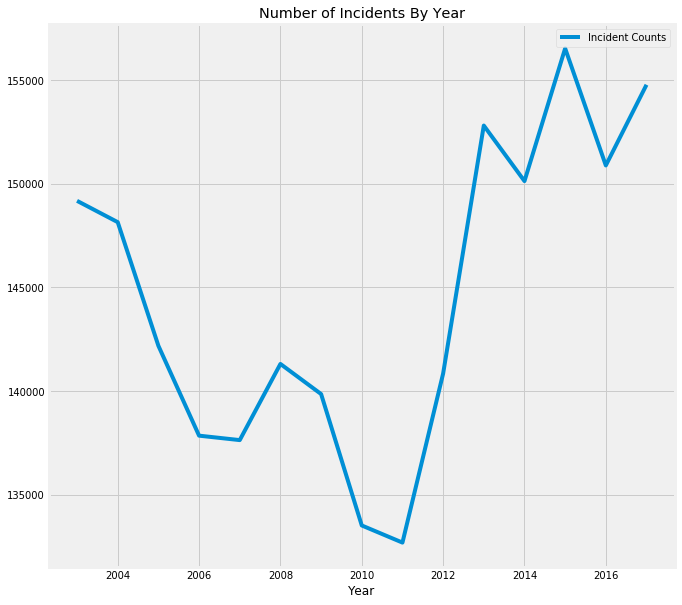

In [5]:
inc_count_data = {'Year': np.arange(2003, 2018), 'Incident Counts': inc_count_by_year[:-1]}
inc_count_tbl = pd.DataFrame(data= inc_count_data)
inc_count_tbl.plot.line(x = 'Year', y = 'Incident Counts', figsize = (10, 10), title = "Number of Incidents By Year")

#### Based on the graph, the number of incidents fell in the range of 130000 to 160000. And there is a clear trend of decreasing crime rates from 2003 through 2011, and drastically rising crime rates from 2011 through 2017. 


### Check to see if these relationship change when looking at particular types of crime

In [6]:
incidents.index.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Datetime Index', length=2215024)

In [7]:
crimes_type = incidents.groupby([(incidents.index.year), 'Category'])['IncidntNum'].count()

In [8]:
crimes_type_df = pd.DataFrame(crimes_type)

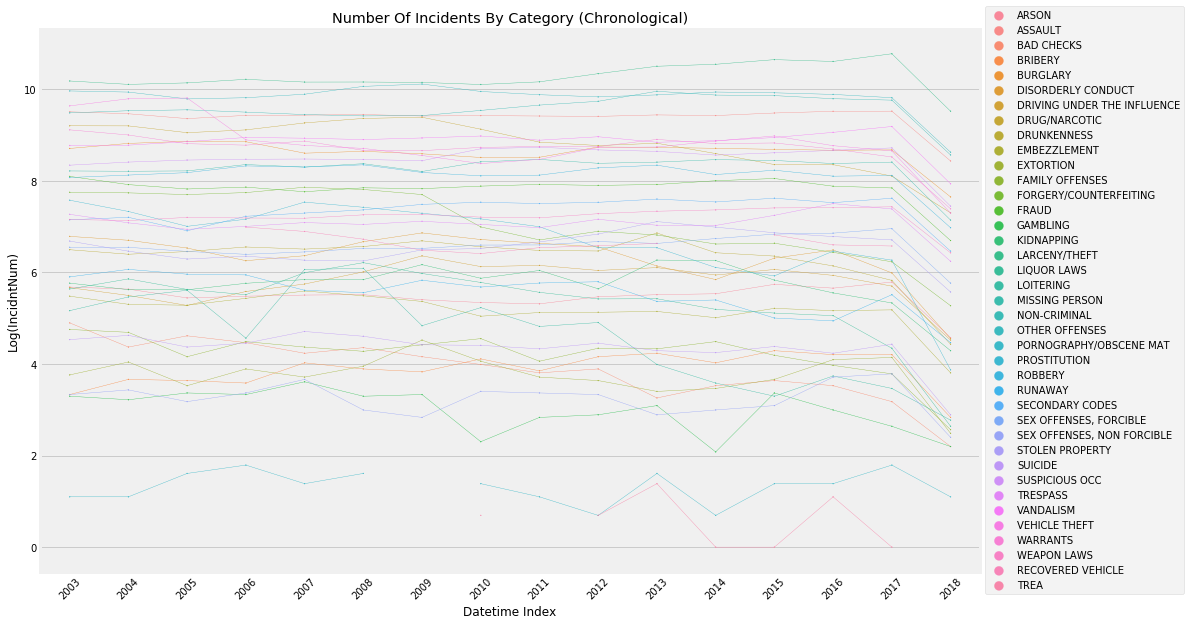

In [9]:
crimes_type_df = pd.DataFrame(crimes_type)
crimes_type_df.reset_index(inplace=True)

# Take the log of the number of incidents by different categories 
# to make a good visualization to demonstrate the trend of change.

crimes_type_df["IncidntNum"]=np.log(crimes_type_df["IncidntNum"])

plot.figure(figsize=(15,10))
plot.title('Number Of Incidents By Category (Chronological)')
sns.pointplot(x="Datetime Index", y="IncidntNum", hue="Category", data=crimes_type_df, scale=0.05)
plot.ylabel("Log(IncidntNum)")
plot.xticks(rotation=45)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 10, markerscale = 10)
plot.show()

####  Based on the graph, while there are still some fluctuations, the trend of crime rates of different individual types follow the same trend with the general trend of crime rates. 

 ### Looking just at 2018, what proportion of the total does each type of crime constitute?

In [10]:
crimes_type_df2 = pd.DataFrame(crimes_type)
crimes_type_df2018 = crimes_type_df2.loc[2018]

In [ ]:
crimes_type_df2018

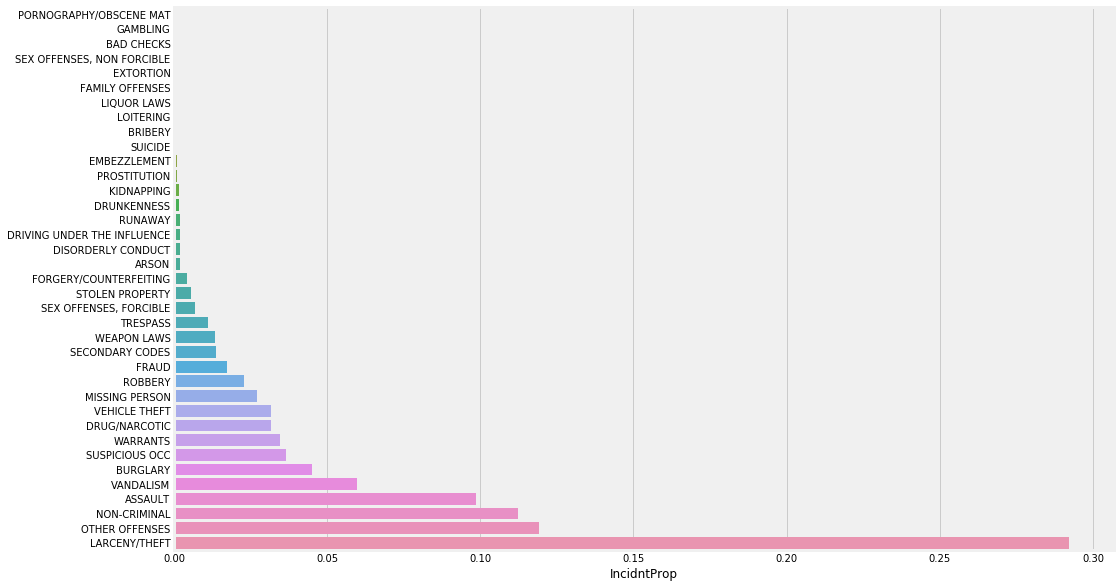

In [12]:
crimes_type_df2018["IncidntProp"] = crimes_type_df2018["IncidntNum"] / sum(crimes_type_df2018["IncidntNum"])
crimes_type_df2018 = crimes_type_df2018.sort_values(by="IncidntProp")
crimes_type_df2018.head(10)

plot.figure(figsize=(15,10))


sns.barplot(data=crimes_type_df2018, x="IncidntProp", y=crimes_type_df2018.index.values)
plot.show()

In [13]:
crimes_type_category_lst = crimes_type_df2018.index

#### Based on the graph, a great number of incidents were of larceny/theft, assault, non-criminal and other offenses, while other crimes account for a relatively small proportion.


###  Is there a relationship between day of week, time, and whether an incident occurs?

In [15]:
week = pd.DataFrame(incidents.groupby(by = ['DayOfWeek'])['IncidntNum'].count())

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week = week.reindex(cats)


week.head()

,IncidntNum
DayOfWeek,
Monday,306587
Tuesday,315135
Wednesday,324020
Thursday,316156
Friday,337941


Text(0.5,0,'Week')

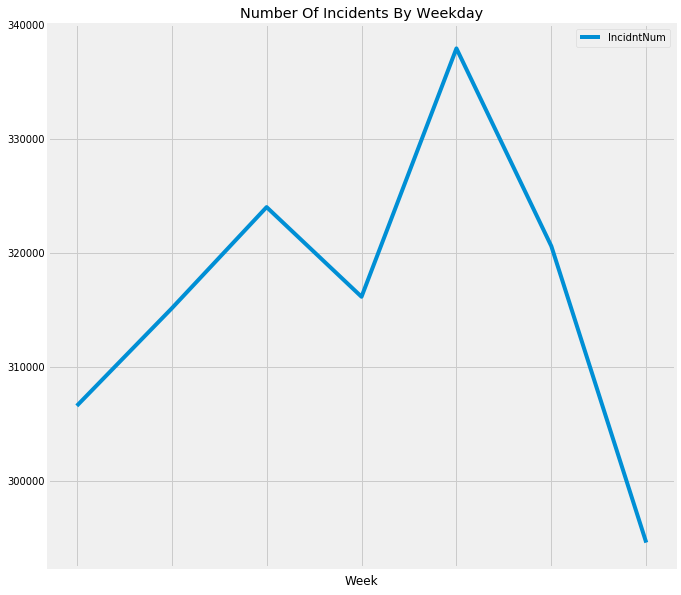

In [16]:
week.plot(figsize = (10, 10), title = 'Number Of Incidents By Weekday')
plot.xlabel('Week')

In [17]:
time_of_day = incidents.loc[:, ['Time', 'IncidntNum', 'Category']]

In [18]:
time_of_day_str = time_of_day['Time'].get_values()

In [19]:
time_of_day_str

array(['02:18', '17:30', '19:20', ..., '01:03', '23:35', '14:30'],
      dtype=object)

In [20]:
def cut_min(a):
    t = str(a)
    h = t[:2]
    return int(h)

In [21]:
time_of_day['Time'] = time_of_day['Time'].apply(cut_min)
time_cat = pd.DataFrame(time_of_day.groupby(by = ['Time', 'Category'])['IncidntNum'].count())
time_inc = pd.DataFrame(time_of_day.groupby(by = ['Time'])['IncidntNum'].count())

Text(0.5,0,'Time')

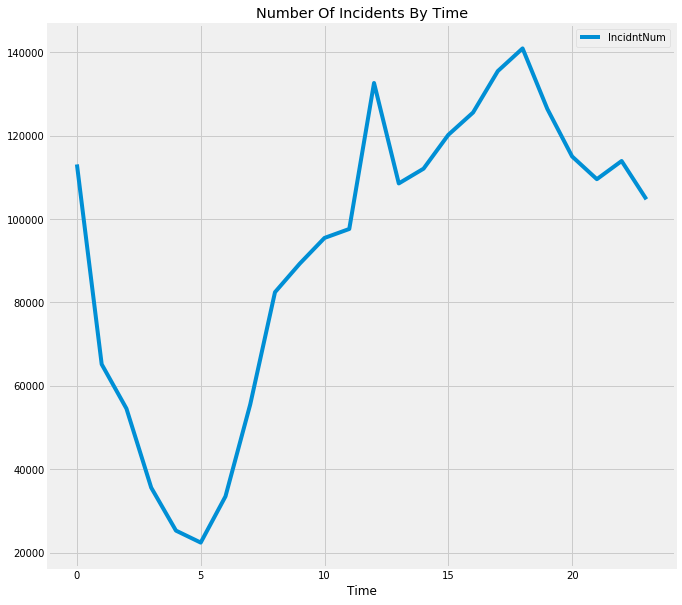

In [22]:
time_inc.plot(figsize = (10, 10), title = 'Number Of Incidents By Time')
plot.xlabel('Time')

In [23]:
time_inc

,IncidntNum
Time,
0,113096
1,65182
2,54550
3,35596
4,25285
5,22413
6,33494
7,55551
8,82459


 #### Based on the graph,  the number of incidents by each day of week vary significantly. Typically, most crimes occur at Friday, Saturday and Wednesday. Sunday has the lowest crime rates, differing by over 40000 incidents compared to Monday, the day of highest crime rates. In terms of time, it is clear to see that starting after noon, crime rates start to climb up, peak at 12 am and rapidly go down after then. 

### Problem 5 
### Is there a relationship between day/time and particular types of incidents? What about time of year?

In [24]:
burglary = incidents.loc[incidents['Category'] == 'BURGLARY']
burglary_w = pd.DataFrame(burglary.groupby(by = ['DayOfWeek', 'Category'])['IncidntNum'].count())
burglary_w

,,IncidntNum
DayOfWeek,Category,
Friday,BURGLARY,15586
Monday,BURGLARY,13084
Saturday,BURGLARY,11948
Sunday,BURGLARY,10786
Thursday,BURGLARY,13518
Tuesday,BURGLARY,13158
Wednesday,BURGLARY,13463


In [25]:
burglary_t = incidents.loc[:, ['Time', 'IncidntNum', 'Category']]
burglary_t = burglary_t.loc[incidents['Category'] == 'BURGLARY']
burglary_t['Time'] = burglary_t['Time'].apply(cut_min)
burglary_t = pd.DataFrame(burglary_t.groupby(by = ['Time', 'Category'])['IncidntNum'].count()

Text(0.5,0,'Week')

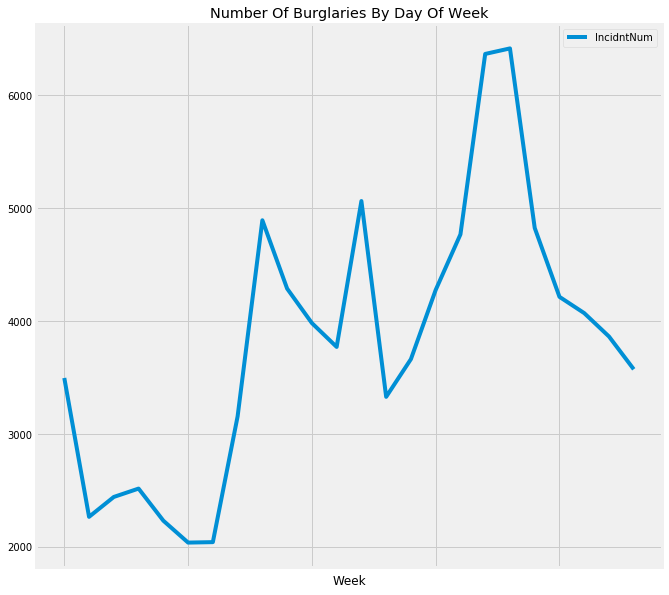

In [26]:
burglary_t.plot(figsize = (10, 10), title = 'Number Of Burglaries By Day Of Week')
plot.xlabel('Week')

In [28]:
def cut_yr(a):
    t = str(a)
    h = t[5:7]
    return int(h)

In [29]:
burglary_m = incidents.loc[:, ['Date', 'IncidntNum', 'Category']]
burglary_m = burglary_m.loc[incidents['Category'] == 'BURGLARY']
burglary_m['Month'] = burglary_m['Date'].apply(cut_yr)
burglary_m = pd.DataFrame(burglary_m.groupby(by = ['Month', 'Category'])['IncidntNum'].count())

Text(0.5,0,'Month')

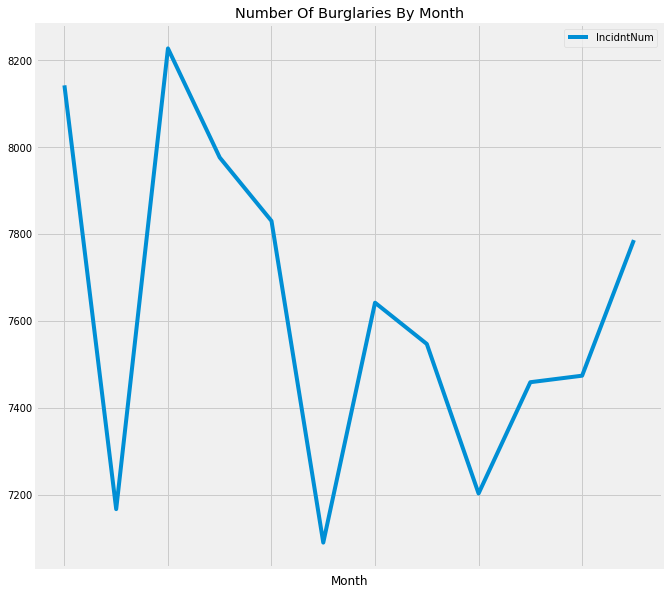

In [30]:
burglary_m.plot(figsize = (10, 10), title = 'Number Of Burglaries By Month')
plot.xlabel('Month')

#### Based on the graph, it is clear to see that burglary typically occurs in between late afternoon and late night, and it is also common for a burglary to happen at 8 am in the morning.  In terms of time of year, it is not obvious if burglary follows a seasonal pattern, but typically during spring ranging from March, April and May and winter including December and January, burglaries are more likely to occur.


### What neighborhoods experience the most crime? Do different neighborhoods experience different types of crimes at different rates, or is the distribution of crime spatially consistent across neighborhoods?

In [32]:
incident_by_region = pd.DataFrame(incidents.groupby("PdDistrict")['IncidntNum'].count())
incident_by_region

,IncidntNum
PdDistrict,
BAYVIEW,221000
CENTRAL,226255
INGLESIDE,194180
MISSION,300076
NORTHERN,272713
PARK,125479
RICHMOND,116818
SOUTHERN,399785
TARAVAL,166971


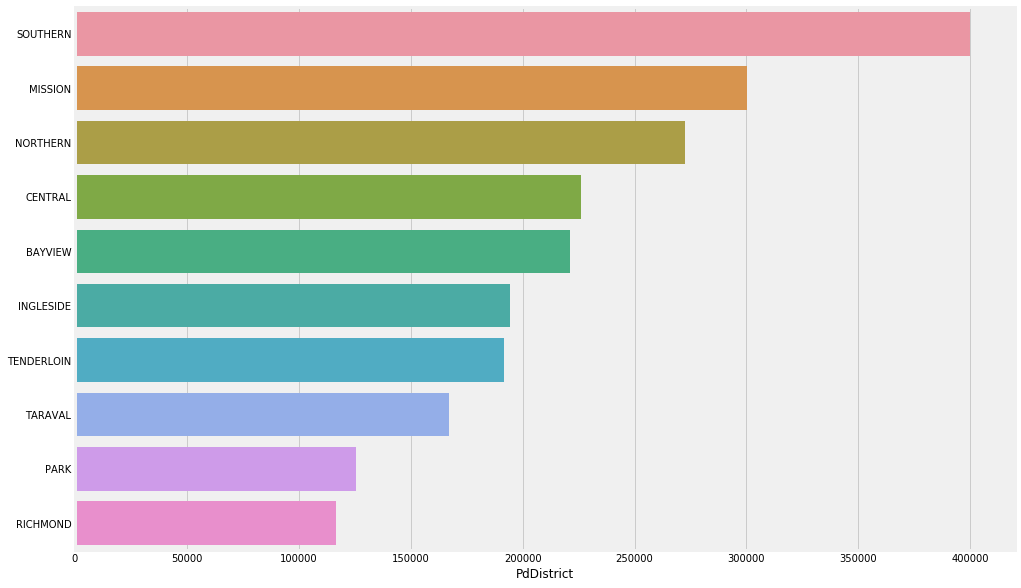

In [33]:
incident_by_region = pd.DataFrame(incidents["PdDistrict"].value_counts())

plot.figure(figsize=(15,10))
sns.barplot(data = incident_by_region, x = 'PdDistrict', y = incident_by_region.index.values)

#### Based on the graph, it is clear to see that the distribution of crime rates is not uniform across different neighborhoods. Southern, Mission and Northern districts have significantly more incidents than the other districts. While Park and Richmond districts have comparatively fewer crime incidents.


### Discuss two other interesting findings from your data.

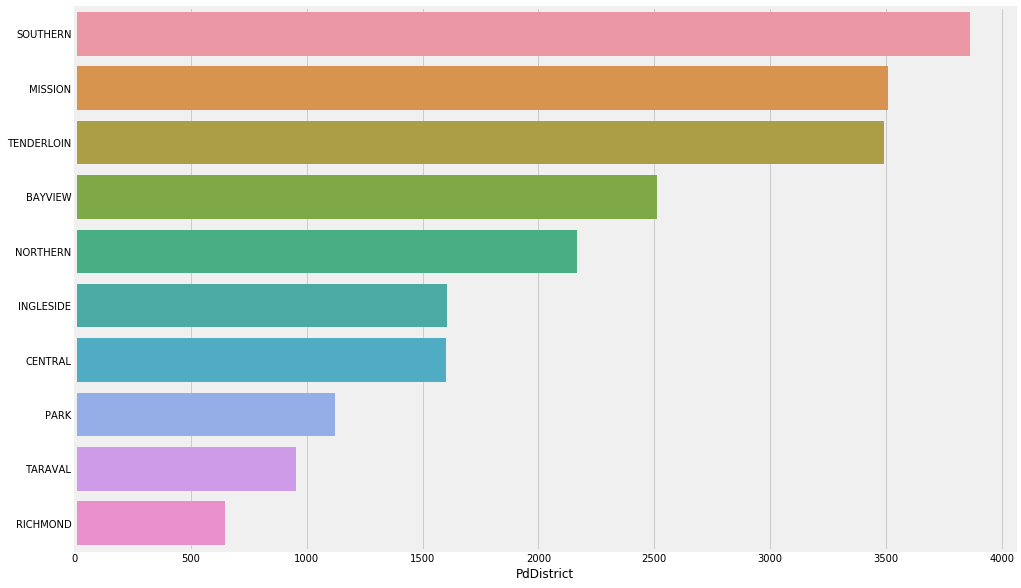

In [34]:
only_Resisting = pd.DataFrame(incidents[incidents['Descript'] == 'RESISTING ARREST']["PdDistrict"].value_counts())
plot.figure(figsize=(15,10))
sns.barplot(data = only_Resisting, x = 'PdDistrict', y = only_Resisting.index.values)

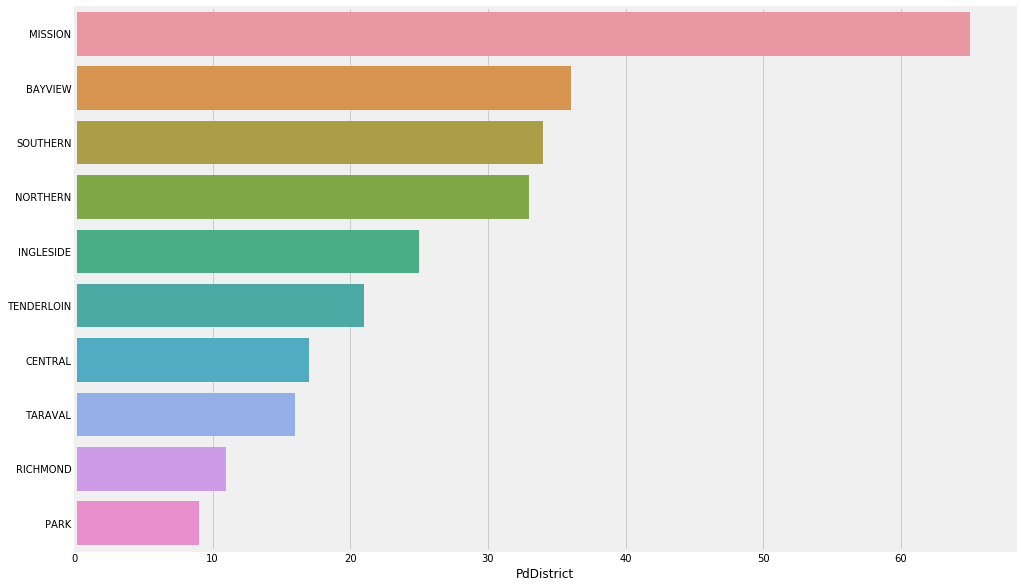

In [35]:
only_false_report = pd.DataFrame(incidents[incidents['Descript'] == 'FALSE REPORT OF CRIME']["PdDistrict"].value_counts())
plot.figure(figsize=(15,10))
sns.barplot(data = only_false_report, x = 'PdDistrict', y = only_false_report.index.values)

#### Based on the first graph, there is little difference between the proportion of offenders who resist arrest and the overall proportion in each district. But Tenderlion has comparatively more people who resist arrest and Central has comparatively fewer people who resist arrest, given their own crime rates. 

#### Based on the second graph,  there is little difference between the proportion of offenders who resist arrest and the overall proportion in each district. But there are comparatively more people who falsely report of crimes in the districts of Mission and Bayview, given their own crime rates.